In [1]:
import numpy
import seaborn

import matplotlib.pyplot as plt

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)


%load_ext autoreload
%autoreload 2

import sys

sys.path.append('../../src')

In [3]:
xgboost_gwas = [
    0.6332,
    0.6374,
    0.6447,
    0.6528,
    0.659,
    0.6599,
    0.6589,
    0.6594,
    0.6598,
    0.658,
    0.6593,
    0.6602,
    0.6622,
    0.6614
]
xgboost_sel = [
    0.6537,
    0.6552,
    0.6564,
    0.6585,
    0.6589,
    0.6598,
    0.6588,
    0.6611,
    0.6601,
    0.6609,
    0.6592,
    0.6584,
    0.6526,
    0.6577
]

xgboost_x = [0.25, 0.5] + list(range(1, 11)) + [15, 20]
snpnet_x = [0.25, 0.5, 0.75] + list(range(1, 11)) + [12, 14, 15, 16, 18, 20]

In [4]:
import pandas

snpnet = pandas.read_csv('asthma_snpnet_big2.csv')
snpnet

,k_snps,gwas,xgb
0,0.25,0.599824,0.626226
1,0.50,0.605761,0.630597
2,0.75,0.610531,0.630439
3,1.00,0.614608,0.632258
4,2.00,0.625673,0.635198
5,3.00,0.631306,0.637543
6,4.00,0.634577,0.638048
7,5.00,0.635500,0.639068
8,6.00,0.635190,0.639355
9,7.00,0.636716,0.640556


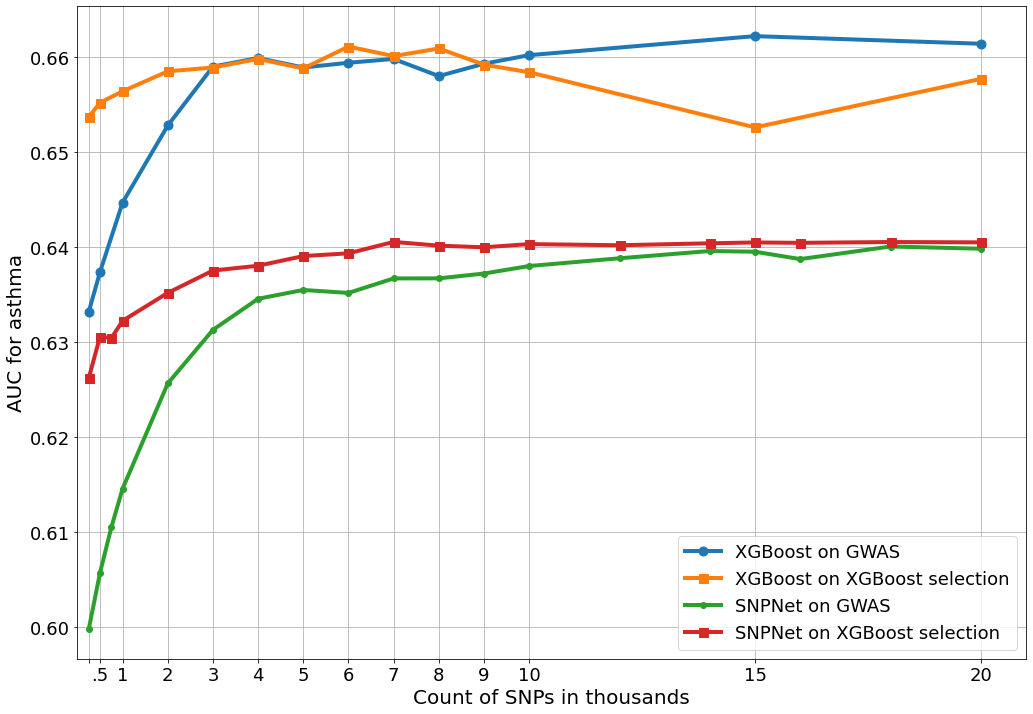

In [9]:
plt.figure(figsize=(17, 12))
plt.plot(xgboost_x, xgboost_gwas, label='XGBoost on GWAS', linewidth=4, marker='o', markersize=9)
plt.plot(xgboost_x, xgboost_sel, label='XGBoost on XGBoost selection', linewidth=4, marker='s', markersize=9)
plt.plot(snpnet_x, snpnet.gwas, label='SNPNet on GWAS', linewidth=4, marker='o')
plt.plot(snpnet_x, snpnet.xgb, label='SNPNet on XGBoost selection', linewidth=4, marker='s', markersize=9)
plt.legend(fontsize=18)
plt.grid(b=True)
plt.xticks(xgboost_x, ['', '.5'] + [int(x) for x in xgboost_x[2:]])
plt.xlim(0, 21)
plt.ylabel('AUC for asthma', fontsize=20)
plt.xlabel('Count of SNPs in thousands', fontsize=20)
plt.savefig('asthma_4methods.pdf')
plt.show()